In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="your_api_key")
project = rf.workspace("metehan-yasar").project("my_pla2")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.70, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to my_pla2-1 in yolov8:: 100%|██████████| 6151/6151 [00:49<00:00, 124.88it/s]


In [ ]:
''' # YOLOv8n (Nano)
model_n = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt')

# YOLOv8s (Small)
model_s = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt')

# YOLOv8m (Medium)
model_m = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8m.pt')

# YOLOv8l (Large)
model_l = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8l.pt')

# YOLOv8x (Extra Large)
model_x = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt') '''

In [ ]:

from ultralytics import YOLO

# Definir la ruta al archivo data.yaml
data_yaml = 'my_pla2-1/data.yaml'

# Inicializar el modelo YOLOv8 pre-entrenado en COCO
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt')

# Entrenar el modelo (fine-tuning)
results = model.train(
    data=data_yaml,
    epochs=100,  # Número de épocas
    imgsz=640,   # Tamaño de la imagen de entrada
    batch=16,    # Tamaño del batch
    name='yolov8n_custom_transfer',  # Nombre para guardar los resultados
    pretrained=True,  # Usar pesos pre-entrenados
    freeze=10,  # Congelar las primeras 10 capas
    lr0=0.001,  # Tasa de aprendizaje inicial
    patience=50,  # Paciencia para early stopping
    save=True,  # Guardar los mejores checkpoints
    device='0'  # Usar GPU 0 (cambia a 'cpu' si no tienes GPU)
)

# Evaluar el modelo en el conjunto de validación
val_results = model.val()


100%|██████████| 6.23M/6.23M [00:00<00:00, 140MB/s]


Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=weights/yolov8n.pt, data=my_pla2-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8n_custom_transfer, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /content/drive/MyDrive/CarLicensePlate/my_pla2-1/train/labels.cache... 2961 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2961/2961 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/drive/MyDrive/CarLicensePlate/my_pla2-1/valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom_transfer/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_custom_transfer
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.73G     0.7536      1.058      1.119          2        640: 100%|██████████| 186/186 [01:18<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        110        110       0.98          1      0.993      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.44G     0.5611     0.5172     0.9746          2        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        110        110      0.991          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.43G     0.5425     0.4227     0.9658          4        640: 100%|██████████| 186/186 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        110        110      0.999          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.44G     0.5222     0.3812     0.9494          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        110        110      0.999          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.43G     0.4887     0.3464     0.9376          4        640: 100%|██████████| 186/186 [01:11<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        110        110       0.99          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.44G     0.4667     0.3291     0.9333          4        640: 100%|██████████| 186/186 [01:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        110        110      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.43G     0.4575      0.318     0.9287          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        110        110      0.999          1      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.44G     0.4447     0.3077     0.9266          4        640: 100%|██████████| 186/186 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        110        110      0.999          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.43G     0.4445     0.3044     0.9194          2        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        110        110          1      0.997      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.44G      0.438     0.2963     0.9204          2        640: 100%|██████████| 186/186 [01:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all        110        110      0.999          1      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.43G     0.4333     0.2939     0.9207          1        640: 100%|██████████| 186/186 [01:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        110        110      0.991      0.997      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.44G     0.4312     0.3033     0.9173          4        640: 100%|██████████| 186/186 [01:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        110        110     0.0242      0.755     0.0222     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.44G     0.4366      0.353     0.9174          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        110        110      0.753      0.936      0.849      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G     0.4328     0.4371     0.9173          4        640: 100%|██████████| 186/186 [01:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        110        110    0.00665      0.636    0.00618    0.00219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.44G     0.4402     0.4769     0.9198          4        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


                   all        110        110      0.106      0.827      0.099     0.0478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.44G      0.529     0.6318     0.9631          2        640: 100%|██████████| 186/186 [01:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


                   all        110        110    0.00352     0.0636    0.00321   0.000559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.44G     0.5601     0.6531     0.9795          1        640: 100%|██████████| 186/186 [01:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        110        110      0.511      0.764      0.479      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.44G     0.5296     0.6712     0.9581          1        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        110        110      0.662      0.856      0.756      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.44G     0.5095     0.6693     0.9503          4        640: 100%|██████████| 186/186 [01:11<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        110        110       0.98      0.982      0.994      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.44G     0.5018     0.6859     0.9456          4        640: 100%|██████████| 186/186 [01:11<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        110        110      0.918      0.955      0.984      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.44G     0.4864     0.6648     0.9369          4        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        110        110      0.998          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.44G     0.4851     0.6236     0.9424          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        110        110      0.963      0.942      0.989      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.43G     0.4847     0.5899     0.9492          2        640: 100%|██████████| 186/186 [01:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        110        110      0.704      0.818       0.68      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.44G     0.4825     0.5987     0.9409          2        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        110        110      0.962      0.917      0.978       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.44G     0.4698     0.5912     0.9323          2        640: 100%|██████████| 186/186 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


                   all        110        110      0.968      0.982      0.994      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.44G     0.4788     0.5903     0.9421          2        640: 100%|██████████| 186/186 [01:11<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        110        110       0.77      0.853      0.882      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.44G     0.4693     0.5858     0.9381          2        640: 100%|██████████| 186/186 [01:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        110        110      0.999      0.973      0.993      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.44G     0.4725     0.5868     0.9348          2        640: 100%|██████████| 186/186 [01:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        110        110       0.91      0.982      0.971        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.44G      0.467     0.5779     0.9356          4        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        110        110      0.997          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.44G     0.4554     0.5645     0.9296          4        640: 100%|██████████| 186/186 [01:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        110        110      0.907      0.927      0.941       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.44G     0.4627     0.5599     0.9337          4        640: 100%|██████████| 186/186 [01:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        110        110      0.946      0.952      0.983      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.44G     0.4481      0.582     0.9302          1        640: 100%|██████████| 186/186 [01:11<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        110        110      0.999          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.44G     0.4471     0.5842     0.9274          2        640: 100%|██████████| 186/186 [01:11<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        110        110      0.997          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.44G     0.4505     0.5989     0.9267          4        640: 100%|██████████| 186/186 [01:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        110        110      0.948      0.994      0.985      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.44G      0.437     0.5996      0.925          2        640: 100%|██████████| 186/186 [01:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        110        110      0.963      0.991      0.983      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.44G     0.4479     0.6195     0.9348          1        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        110        110          1      0.989      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.43G      0.437     0.5935     0.9256          2        640: 100%|██████████| 186/186 [01:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        110        110      0.965      0.982      0.992      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.44G     0.4367     0.6183     0.9254          2        640: 100%|██████████| 186/186 [01:10<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        110        110      0.997          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.43G     0.4294     0.6132     0.9227          4        640: 100%|██████████| 186/186 [01:08<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        110        110      0.835      0.909      0.927      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.44G     0.4441     0.6288     0.9273          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        110        110      0.991      0.991      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.44G     0.4456     0.6432     0.9319          4        640: 100%|██████████| 186/186 [01:11<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        110        110      0.964      0.965      0.991      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.44G     0.4446     0.6386     0.9286          4        640: 100%|██████████| 186/186 [01:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        110        110      0.978      0.991      0.994      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.44G     0.4497     0.6419      0.932          4        640: 100%|██████████| 186/186 [01:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        110        110      0.977          1      0.994      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.44G     0.4526     0.6491      0.939          1        640: 100%|██████████| 186/186 [01:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        110        110          1      0.998      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.44G     0.4573      0.596     0.9363          2        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        110        110      0.952      0.973      0.983      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.44G     0.4518      0.586     0.9338          2        640: 100%|██████████| 186/186 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        110        110      0.989          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.44G     0.4636     0.6138     0.9413          2        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        110        110      0.999          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.44G     0.4426     0.5871     0.9302          4        640: 100%|██████████| 186/186 [01:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        110        110      0.995      0.991      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.44G     0.4509     0.6045      0.937          1        640: 100%|██████████| 186/186 [01:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        110        110      0.995          1      0.995      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.44G     0.4506     0.6352     0.9372          1        640: 100%|██████████| 186/186 [01:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        110        110      0.999          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.44G      0.452     0.5833     0.9346          4        640: 100%|██████████| 186/186 [01:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        110        110      0.999          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.44G     0.4738     0.6146     0.9453          1        640: 100%|██████████| 186/186 [01:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        110        110      0.999          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.44G     0.4716     0.6053     0.9463          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        110        110      0.939      0.984      0.989      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.44G     0.4743     0.6146     0.9476          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        110        110      0.982      0.987      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.44G     0.4879     0.5923     0.9527          4        640: 100%|██████████| 186/186 [01:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        110        110      0.979      0.991      0.994      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.44G     0.4872     0.5037       0.95          2        640: 100%|██████████| 186/186 [01:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        110        110          1      0.997      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.44G     0.4796     0.5223     0.9464          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        110        110          1      0.998      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.44G     0.4745     0.5121     0.9411          4        640: 100%|██████████| 186/186 [01:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        110        110      0.993          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.44G     0.4777     0.5297     0.9486          4        640: 100%|██████████| 186/186 [01:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        110        110      0.999          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.44G      0.467     0.5151     0.9424          2        640: 100%|██████████| 186/186 [01:08<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        110        110      0.999          1      0.995      0.856
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



60 epochs completed in 1.248 hours.
Optimizer stripped from runs/detect/yolov8n_custom_transfer/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8n_custom_transfer/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom_transfer/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


                   all        110        110      0.999          1      0.995      0.883
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/yolov8n_custom_transfer
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/CarLicensePlate/my_pla2-1/valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


                   all        110        110      0.999          1      0.995      0.881
Speed: 0.4ms preprocess, 19.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/yolov8n_custom_transfer2


In [ ]:
from ultralytics import YOLO
import glob
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import numpy as np

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/CarLicensePlate/runs/detect/yolov8n_custom_transfer/weights/best.pt')  # Ajusta esta ruta a donde se guardó tu mejor modelo

# Directorio que contiene las imágenes para validar
image_dir = '/content/drive/MyDrive/CarLicensePlate/my_pla2-1/valid/images'  # Ajusta esta ruta a tu directorio de imágenes

# Obtener todas las imágenes en el directorio
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

# Crear un directorio para guardar los resultados
results_dir = 'validation_results'
os.makedirs(results_dir, exist_ok=True)

# Procesar cada imagen
for img_path in image_files:
    # Realizar la predicción
    results = model(img_path)

    # Obtener la imagen con las detecciones dibujadas
    img = results[0].plot()

    # Convertir de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Guardar la imagen con las detecciones
    output_path = os.path.join(results_dir, os.path.basename(img_path))
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Mostrar la imagen usando cv2_imshow
    cv2_imshow(img_rgb)

    # Mostrar información sobre las detecciones
    print(f"Detecciones para {os.path.basename(img_path)}:")
    for r in results:
        print(f"Número de objetos detectados: {len(r.boxes)}")
        for box in r.boxes:
            print(f"  Clase: {model.names[int(box.cls)]}, Confianza: {box.conf.item():.2f}")

    print("\n")  # Agregar una línea en blanco entre imágenes

print(f"Resultados guardados en {results_dir}")

In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,882 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,393 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 

Procesando: 01_36_jpg.rf.af8d3fd8d761096800ee8170dfe4934a.jpg

0: 224x640 1 my_pla2, 11.1ms
Speed: 1.5ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 01_36_jpg.rf.af8d3fd8d761096800ee8170dfe4934a.jpg, Texto de la placa: O1 AAC 42


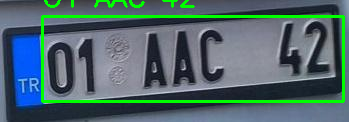



Procesando: 02_52_jpg.rf.bf438c75386e5e15ca10dee1de5bddf9.jpg

0: 512x640 2 my_pla2s, 33.4ms
Speed: 4.2ms preprocess, 33.4ms inference, 10.3ms postprocess per image at shape (1, 3, 512, 640)
Imagen: 02_52_jpg.rf.bf438c75386e5e15ca10dee1de5bddf9.jpg, Texto de la placa: 
Imagen: 02_52_jpg.rf.bf438c75386e5e15ca10dee1de5bddf9.jpg, Texto de la placa: 


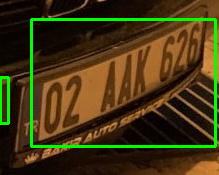



Procesando: 02_69_jpg.rf.c8fe1ecc9fb1fc088121b57072179d75.jpg

0: 640x640 1 my_pla2, 18.4ms
Speed: 8.6ms preprocess, 18.4ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)
Imagen: 02_69_jpg.rf.c8fe1ecc9fb1fc088121b57072179d75.jpg, Texto de la placa: Fa


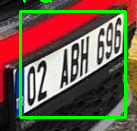



Procesando: 03_96_jpg.rf.ed1f44d7f138bf010dc1273b3a10e99f.jpg

0: 224x640 3 my_pla2s, 18.5ms
Speed: 1.5ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 03_96_jpg.rf.ed1f44d7f138bf010dc1273b3a10e99f.jpg, Texto de la placa: 03 AAE 178
Imagen: 03_96_jpg.rf.ed1f44d7f138bf010dc1273b3a10e99f.jpg, Texto de la placa: 
Imagen: 03_96_jpg.rf.ed1f44d7f138bf010dc1273b3a10e99f.jpg, Texto de la placa: |


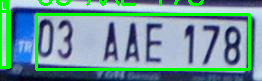



Procesando: 03_98_jpg.rf.3ceedf3ed85734be377a7396b364410b.jpg

0: 256x640 2 my_pla2s, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 03_98_jpg.rf.3ceedf3ed85734be377a7396b364410b.jpg, Texto de la placa: 03 ACS 062)
Imagen: 03_98_jpg.rf.3ceedf3ed85734be377a7396b364410b.jpg, Texto de la placa: |


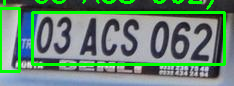



Procesando: 05_35_jpg.rf.ec1820d0d48787f105fab6546bcefeb9.jpg

0: 224x640 1 my_pla2, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 4.2ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 05_35_jpg.rf.ec1820d0d48787f105fab6546bcefeb9.jpg, Texto de la placa: 05 ACA 890!


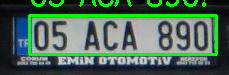



Procesando: 06_176_jpg.rf.fd65e61be6c1032fd3af5b62d7a7896c.jpg

0: 448x640 1 my_pla2, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Imagen: 06_176_jpg.rf.fd65e61be6c1032fd3af5b62d7a7896c.jpg, Texto de la placa: aT LUN


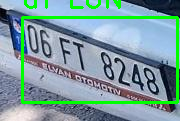



Procesando: 06_19_jpg.rf.c7560e1f699a521249763472765635f3.jpg

0: 224x640 1 my_pla2, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 4.9ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 06_19_jpg.rf.c7560e1f699a521249763472765635f3.jpg, Texto de la placa: 06 ABB 63C


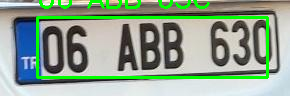



Procesando: 06_372_jpg.rf.ea4949aa616591822ad11d0f1a4e9f52.jpg

0: 384x640 1 my_pla2, 13.7ms
Speed: 2.6ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Imagen: 06_372_jpg.rf.ea4949aa616591822ad11d0f1a4e9f52.jpg, Texto de la placa: 


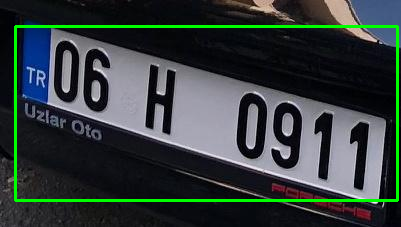



Procesando: 06_61_jpg.rf.86b368b47e3b38338f9c114ae754052c.jpg

0: 288x640 1 my_pla2, 17.4ms
Speed: 2.6ms preprocess, 17.4ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 06_61_jpg.rf.86b368b47e3b38338f9c114ae754052c.jpg, Texto de la placa: 0871


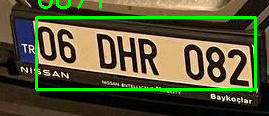



Procesando: 06_72_jpg.rf.70c71878a6666f216339c7ecc8de6efd.jpg

0: 288x640 1 my_pla2, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 06_72_jpg.rf.70c71878a6666f216339c7ecc8de6efd.jpg, Texto de la placa: 06. AB .1606


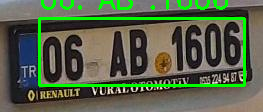



Procesando: 07_141_jpg.rf.dd22762522902a2d31a55f3d3aca4d50.jpg

0: 320x640 1 my_pla2, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 07_141_jpg.rf.dd22762522902a2d31a55f3d3aca4d50.jpg, Texto de la placa: ( ) 7 LRN


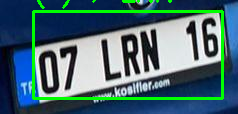



Procesando: 07_166_jpg.rf.5fd9c4cf99f69e3eea7e905b3be40c0a.jpg

0: 352x640 1 my_pla2, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 2.5ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 07_166_jpg.rf.5fd9c4cf99f69e3eea7e905b3be40c0a.jpg, Texto de la placa: 


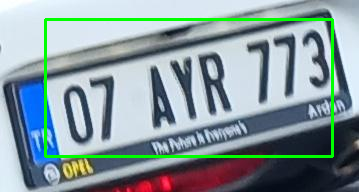



Procesando: 07_167_jpg.rf.f42adab09418af255a5190702c1b0641.jpg

0: 224x640 1 my_pla2, 19.9ms
Speed: 1.9ms preprocess, 19.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 07_167_jpg.rf.f42adab09418af255a5190702c1b0641.jpg, Texto de la placa: 07 APN 606


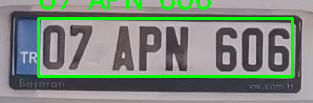



Procesando: 07_190_jpg.rf.7a741b16b0d3fd6928a46e71a8c72fda.jpg

0: 448x640 1 my_pla2, 18.1ms
Speed: 2.5ms preprocess, 18.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Imagen: 07_190_jpg.rf.7a741b16b0d3fd6928a46e71a8c72fda.jpg, Texto de la placa: 


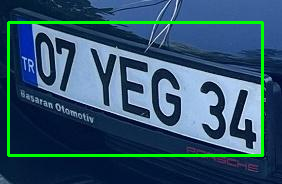



Procesando: 07_193_jpg.rf.df36ef91d12b74f4e3c648198f1c0bdf.jpg

0: 256x640 1 my_pla2, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 07_193_jpg.rf.df36ef91d12b74f4e3c648198f1c0bdf.jpg, Texto de la placa: 07 HC 2800)


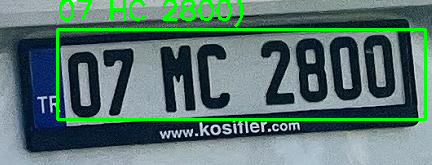



Procesando: 08_132_jpg.rf.b6f61ec97d11ba43cdc4bd0ca2e3bc67.jpg

0: 256x640 1 my_pla2, 13.2ms
Speed: 1.6ms preprocess, 13.2ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 08_132_jpg.rf.b6f61ec97d11ba43cdc4bd0ca2e3bc67.jpg, Texto de la placa: O8AAF832


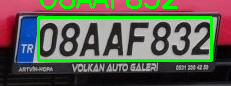



Procesando: 08_1662_jpg.rf.536fcbc2a58bca844043378634df0301.jpg

0: 288x640 1 my_pla2, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 08_1662_jpg.rf.536fcbc2a58bca844043378634df0301.jpg, Texto de la placa: 08 AAK 052)


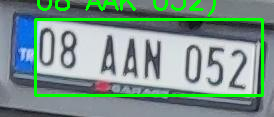



Procesando: 09_199_jpg.rf.cf668ec2d9c79b9785f63daa3ca2f1cd.jpg

0: 256x640 1 my_pla2, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 09_199_jpg.rf.cf668ec2d9c79b9785f63daa3ca2f1cd.jpg, Texto de la placa: 09 EA 53:


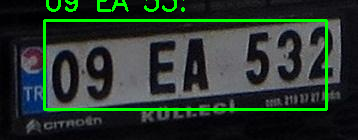



Procesando: 10_106_jpg.rf.5bec1f7c18896bb75701e6ce2529849c.jpg

0: 224x640 1 my_pla2, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 10_106_jpg.rf.5bec1f7c18896bb75701e6ce2529849c.jpg, Texto de la placa: 10 AI1P366


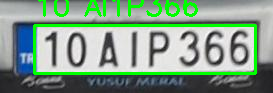



Procesando: 10_1902_jpg.rf.ac1f5e9eb85b8961d8e340168878287c.jpg

0: 192x640 1 my_pla2, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 10_1902_jpg.rf.ac1f5e9eb85b8961d8e340168878287c.jpg, Texto de la placa: 10 BL 648


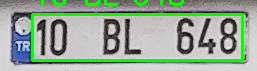



Procesando: 11_131_jpg.rf.59a79abd7a73f165a89d0b6ad2c78ee7.jpg

0: 320x640 1 my_pla2, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 11_131_jpg.rf.59a79abd7a73f165a89d0b6ad2c78ee7.jpg, Texto de la placa: 


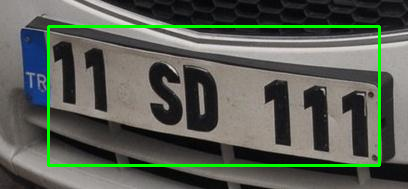



Procesando: 11_2_jpg.rf.c3c1e8e28feb65943eb5c545367124cc.jpg

0: 384x640 1 my_pla2, 13.9ms
Speed: 2.5ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Imagen: 11_2_jpg.rf.c3c1e8e28feb65943eb5c545367124cc.jpg, Texto de la placa: Lae


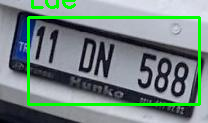



Procesando: 15_127_jpg.rf.b170bf5d88d4a9ac4bfacba13a905303.jpg

0: 256x640 1 my_pla2, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 15_127_jpg.rf.b170bf5d88d4a9ac4bfacba13a905303.jpg, Texto de la placa: 15 KB 120


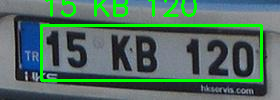



Procesando: 15_170_jpg.rf.11a0a79e1927ffc3b46c390c9fef93ea.jpg

0: 256x640 1 my_pla2, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 15_170_jpg.rf.11a0a79e1927ffc3b46c390c9fef93ea.jpg, Texto de la placa: 15 ER 362


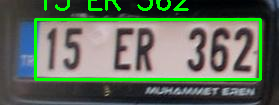



Procesando: 15_171_jpg.rf.71344d1716a5ff9c6eae31040bffc8f6.jpg

0: 224x640 1 my_pla2, 14.1ms
Speed: 1.6ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 15_171_jpg.rf.71344d1716a5ff9c6eae31040bffc8f6.jpg, Texto de la placa: \SELOG74


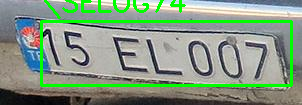



Procesando: 15_49_jpg.rf.513b2bc607d1e3d2f46a80af76f599d4.jpg

0: 224x640 1 my_pla2, 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 15_49_jpg.rf.513b2bc607d1e3d2f46a80af76f599d4.jpg, Texto de la placa: 15 NB 3553


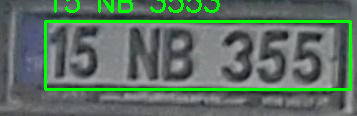



Procesando: 16_137_jpg.rf.d40edc88a8be9b62b3268512135c7292.jpg

0: 352x640 1 my_pla2, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 16_137_jpg.rf.d40edc88a8be9b62b3268512135c7292.jpg, Texto de la placa: So ated


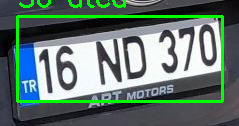



Procesando: 16_139_jpg.rf.5ca1ff743510e6197969d481c56a7cec.jpg

0: 192x640 1 my_pla2, 9.6ms
Speed: 4.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 16_139_jpg.rf.5ca1ff743510e6197969d481c56a7cec.jpg, Texto de la placa: AG=ANUZ976


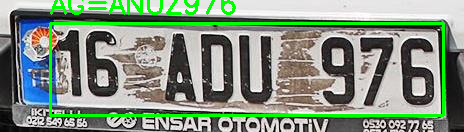



Procesando: 16_194_jpg.rf.40959623973dd7f19b7e1cee190cbf68.jpg

0: 320x640 1 my_pla2, 18.5ms
Speed: 2.9ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 16_194_jpg.rf.40959623973dd7f19b7e1cee190cbf68.jpg, Texto de la placa: 1G APC G35


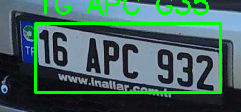



Procesando: 16_98_jpg.rf.a8dd292d8f6e1659eb813cb72a7a7fcb.jpg

0: 224x640 1 my_pla2, 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 16_98_jpg.rf.a8dd292d8f6e1659eb813cb72a7a7fcb.jpg, Texto de la placa: 16 E 0843


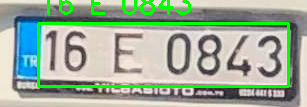



Procesando: 17_120_jpg.rf.14871294ec60fc1142b0e829eec13344.jpg

0: 192x640 1 my_pla2, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 17_120_jpg.rf.14871294ec60fc1142b0e829eec13344.jpg, Texto de la placa: 17 NG 286%


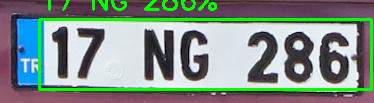



Procesando: 17_155_jpg.rf.02f0035993f7c1d30b281379ca7dab7e.jpg

0: 256x640 1 my_pla2, 15.4ms
Speed: 1.7ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 17_155_jpg.rf.02f0035993f7c1d30b281379ca7dab7e.jpg, Texto de la placa: 17 GK 325]


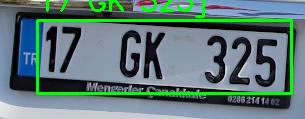



Procesando: 17_156_jpg.rf.007b11ae92e20f7c7cf9e3ce32040424.jpg

0: 320x640 1 my_pla2, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 17_156_jpg.rf.007b11ae92e20f7c7cf9e3ce32040424.jpg, Texto de la placa: 17 FLO


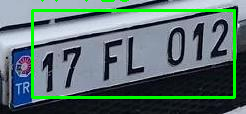



Procesando: 17_157_jpg.rf.29e253ebb2ffa2afd94af9513ba2f57d.jpg

0: 384x640 3 my_pla2s, 10.3ms
Speed: 3.3ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Imagen: 17_157_jpg.rf.29e253ebb2ffa2afd94af9513ba2f57d.jpg, Texto de la placa: 
Imagen: 17_157_jpg.rf.29e253ebb2ffa2afd94af9513ba2f57d.jpg, Texto de la placa: |
Imagen: 17_157_jpg.rf.29e253ebb2ffa2afd94af9513ba2f57d.jpg, Texto de la placa: |


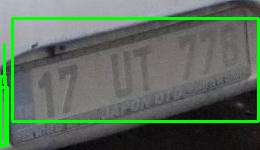



Procesando: 17_78_jpg.rf.c140958775d43ccd0e551bf6547fea9c.jpg

0: 320x640 1 my_pla2, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 17_78_jpg.rf.c140958775d43ccd0e551bf6547fea9c.jpg, Texto de la placa: 


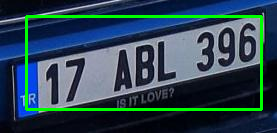



Procesando: 19_28_jpg.rf.495c269df5b53d70fd9e0f219d2cfdc8.jpg

0: 288x640 1 my_pla2, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 19_28_jpg.rf.495c269df5b53d70fd9e0f219d2cfdc8.jpg, Texto de la placa: M9 KY 019


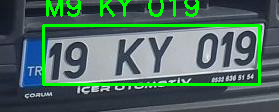



Procesando: 20_136_jpg.rf.e826840699ebb54110967abd306985ba.jpg

0: 256x640 1 my_pla2, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 20_136_jpg.rf.e826840699ebb54110967abd306985ba.jpg, Texto de la placa: 


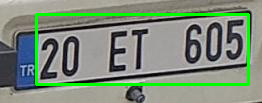



Procesando: 20_94_jpg.rf.3ddf054a24bcc428a1fb944fc1b5e94d.jpg

0: 256x640 1 my_pla2, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 20_94_jpg.rf.3ddf054a24bcc428a1fb944fc1b5e94d.jpg, Texto de la placa: 90 BBU 88


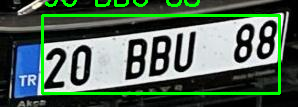



Procesando: 21_100_jpg.rf.761692e9f1f63e56d2d83031f1dd3228.jpg

0: 256x640 1 my_pla2, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 21_100_jpg.rf.761692e9f1f63e56d2d83031f1dd3228.jpg, Texto de la placa: 71 AK 836


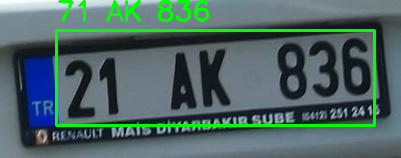



Procesando: 21_97_jpg.rf.7fc8af60a6141a7833092a0167d1ad5e.jpg

0: 288x640 1 my_pla2, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 21_97_jpg.rf.7fc8af60a6141a7833092a0167d1ad5e.jpg, Texto de la placa: m1 HD 032


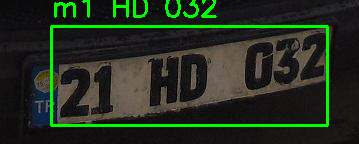



Procesando: 22_332_jpg.rf.05dc46c53758de7ffd0a3a65f09885d3.jpg

0: 224x640 1 my_pla2, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 22_332_jpg.rf.05dc46c53758de7ffd0a3a65f09885d3.jpg, Texto de la placa: 72 FA 454


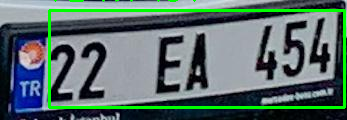



Procesando: 22_98_jpg.rf.27f7ffae655774915308984aea37ff56.jpg

0: 416x640 1 my_pla2, 15.2ms
Speed: 2.4ms preprocess, 15.2ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 640)
Imagen: 22_98_jpg.rf.27f7ffae655774915308984aea37ff56.jpg, Texto de la placa: ZNK 435


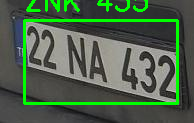



Procesando: 23_1022_jpg.rf.434a605d42a05ae7b2d443072f346970.jpg

0: 224x640 1 my_pla2, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 23_1022_jpg.rf.434a605d42a05ae7b2d443072f346970.jpg, Texto de la placa: 23 DH 202)


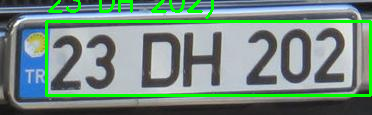



Procesando: 23_962_jpg.rf.cae859b3b2d99f92978b7758e0b614ee.jpg

0: 352x640 1 my_pla2, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 23_962_jpg.rf.cae859b3b2d99f92978b7758e0b614ee.jpg, Texto de la placa: 


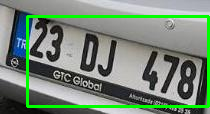



Procesando: 27_165_jpg.rf.97573c51f80954a96a947f38f6420c73.jpg

0: 256x640 2 my_pla2s, 11.0ms
Speed: 1.6ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 27_165_jpg.rf.97573c51f80954a96a947f38f6420c73.jpg, Texto de la placa: a7 1 2110
Imagen: 27_165_jpg.rf.97573c51f80954a96a947f38f6420c73.jpg, Texto de la placa: |


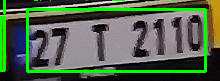



Procesando: 27_44_jpg.rf.66ed3b4434473d6498707881e7166934.jpg

0: 224x640 1 my_pla2, 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 27_44_jpg.rf.66ed3b4434473d6498707881e7166934.jpg, Texto de la placa: 27 P 8450


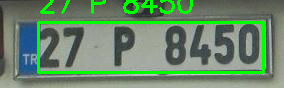



Procesando: 28_141_jpg.rf.dbfc23b5fbc05aecd1da1a9578ee77eb.jpg

0: 256x640 1 my_pla2, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 28_141_jpg.rf.dbfc23b5fbc05aecd1da1a9578ee77eb.jpg, Texto de la placa: 28 AANOD2


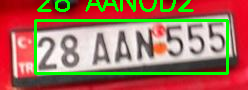



Procesando: 28_68_jpg.rf.be649612e552ebbfffab3f9c7bb2682f.jpg

0: 448x640 1 my_pla2, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Imagen: 28_68_jpg.rf.be649612e552ebbfffab3f9c7bb2682f.jpg, Texto de la placa: 


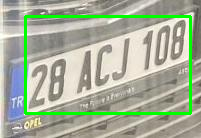



Procesando: 32_88_jpg.rf.ac169a784af2288ccec4b46418a57b13.jpg

0: 352x640 1 my_pla2, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 32_88_jpg.rf.ac169a784af2288ccec4b46418a57b13.jpg, Texto de la placa: RZ ACB 279)


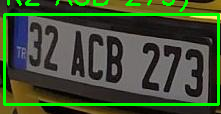



Procesando: 33_12_jpg.rf.fcbc120290ebeb4cf892457c81c18705.jpg

0: 640x608 1 my_pla2, 10.1ms
Speed: 3.2ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)
Imagen: 33_12_jpg.rf.fcbc120290ebeb4cf892457c81c18705.jpg, Texto de la placa: (i


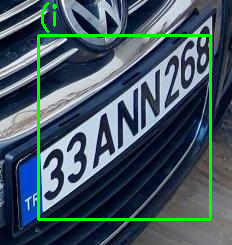



Procesando: 33_28_jpg.rf.ecb4902b3fcee996ce70887276bd7a83.jpg

0: 224x640 1 my_pla2, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 33_28_jpg.rf.ecb4902b3fcee996ce70887276bd7a83.jpg, Texto de la placa: 33 CBA 55]


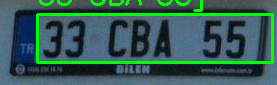



Procesando: 34_140_jpg.rf.cb0292811500d7813398df0831ab5984.jpg

0: 288x640 1 my_pla2, 10.8ms
Speed: 2.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 34_140_jpg.rf.cb0292811500d7813398df0831ab5984.jpg, Texto de la placa: 34 EUC 05


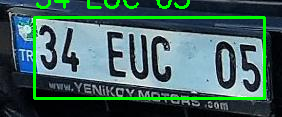



Procesando: 38_117_jpg.rf.410345513ead13ffc69b5a94cae686ff.jpg

0: 352x640 1 my_pla2, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 38_117_jpg.rf.410345513ead13ffc69b5a94cae686ff.jpg, Texto de la placa: 8 sy


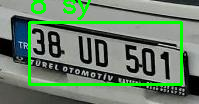



Procesando: 38_15_jpg.rf.8a6c6052e953d61c5f3353c897c660b4.jpg

0: 416x640 1 my_pla2, 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Imagen: 38_15_jpg.rf.8a6c6052e953d61c5f3353c897c660b4.jpg, Texto de la placa: 


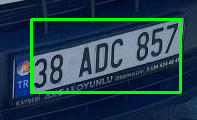



Procesando: 38_54_jpg.rf.cbe07aa076abeb758ddb19324ee7f678.jpg

0: 416x640 1 my_pla2, 19.6ms
Speed: 2.2ms preprocess, 19.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Imagen: 38_54_jpg.rf.cbe07aa076abeb758ddb19324ee7f678.jpg, Texto de la placa: 


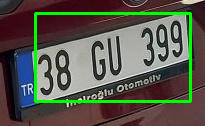



Procesando: 38_89_jpg.rf.020ac084df545af97c87867cf251cab4.jpg

0: 224x640 1 my_pla2, 16.1ms
Speed: 1.6ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 38_89_jpg.rf.020ac084df545af97c87867cf251cab4.jpg, Texto de la placa: 38 AHK 631:


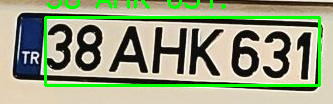



Procesando: 41_11_jpg.rf.1a8f07ecadcc10191c54c6d979848767.jpg

0: 224x640 1 my_pla2, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 41_11_jpg.rf.1a8f07ecadcc10191c54c6d979848767.jpg, Texto de la placa: 41 SK 880


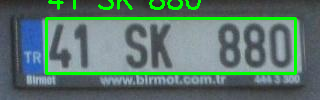



Procesando: 41_171_jpg.rf.ae7fa875c1beee9eee7acf878223f345.jpg

0: 224x640 1 my_pla2, 13.0ms
Speed: 1.5ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 41_171_jpg.rf.ae7fa875c1beee9eee7acf878223f345.jpg, Texto de la placa: 41 DD 055


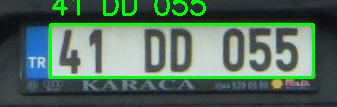



Procesando: 41_40_jpg.rf.1257b4c91502b8225db8ddb4ef133619.jpg

0: 352x640 1 my_pla2, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 41_40_jpg.rf.1257b4c91502b8225db8ddb4ef133619.jpg, Texto de la placa: 


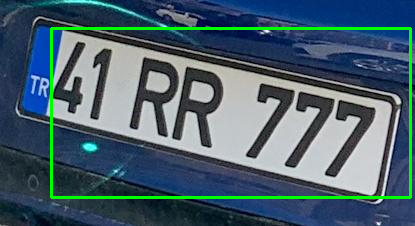



Procesando: 42_161_jpg.rf.2a219288078706ffa1416b0145b2569f.jpg

0: 224x640 1 my_pla2, 10.3ms
Speed: 1.4ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 42_161_jpg.rf.2a219288078706ffa1416b0145b2569f.jpg, Texto de la placa: 4,2ACT999


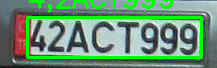



Procesando: 42_73_jpg.rf.6683ffd524f43ced5ffef66a9fa8ef9e.jpg

0: 256x640 1 my_pla2, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 42_73_jpg.rf.6683ffd524f43ced5ffef66a9fa8ef9e.jpg, Texto de la placa: 42 VP 242:


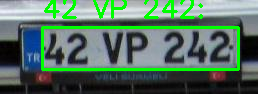



Procesando: 43_179_jpg.rf.032f8c6d5359dca1e9f102e2a19afc02.jpg

0: 224x640 2 my_pla2s, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 43_179_jpg.rf.032f8c6d5359dca1e9f102e2a19afc02.jpg, Texto de la placa: 43 ARK 476
Imagen: 43_179_jpg.rf.032f8c6d5359dca1e9f102e2a19afc02.jpg, Texto de la placa: |


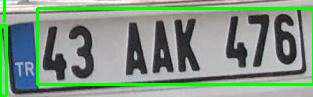



Procesando: 43_20_jpg.rf.3f42fffdd1c285bf222b2a45f50ce56f.jpg

0: 384x640 1 my_pla2, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Imagen: 43_20_jpg.rf.3f42fffdd1c285bf222b2a45f50ce56f.jpg, Texto de la placa: iyo 783


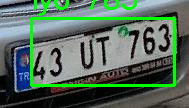



Procesando: 44_1022_jpg.rf.a48e6bf08f5d50fedd4a49fe8afac48d.jpg

0: 256x640 1 my_pla2, 20.2ms
Speed: 1.6ms preprocess, 20.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 44_1022_jpg.rf.a48e6bf08f5d50fedd4a49fe8afac48d.jpg, Texto de la placa: 44 ABN 056)


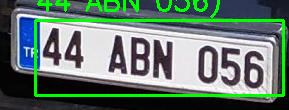



Procesando: 44_163_jpg.rf.83a781171186ca95152d7a67188d001c.jpg

0: 288x640 2 my_pla2s, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 3.6ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 44_163_jpg.rf.83a781171186ca95152d7a67188d001c.jpg, Texto de la placa: 44 AS 360)
Imagen: 44_163_jpg.rf.83a781171186ca95152d7a67188d001c.jpg, Texto de la placa: |


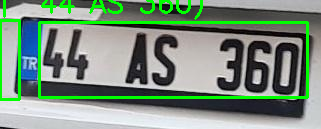



Procesando: 44_37_jpg.rf.188d5973212c81bb8c63371bcc869a52.jpg

0: 288x640 1 my_pla2, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 44_37_jpg.rf.188d5973212c81bb8c63371bcc869a52.jpg, Texto de la placa: 44 HU 0665


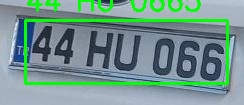



Procesando: 46_189_jpg.rf.3d988114462eaa77eb04c994b947284a.jpg

0: 384x640 1 my_pla2, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Imagen: 46_189_jpg.rf.3d988114462eaa77eb04c994b947284a.jpg, Texto de la placa: 


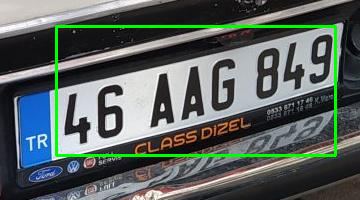



Procesando: 46_195_jpg.rf.c135b12110568dcb0b1a07a0838f5e9d.jpg

0: 416x640 1 my_pla2, 14.5ms
Speed: 2.4ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Imagen: 46_195_jpg.rf.c135b12110568dcb0b1a07a0838f5e9d.jpg, Texto de la placa: 


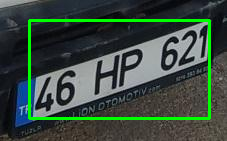



Procesando: 46_31_jpg.rf.dc71966803575fd97a1db7291e1843e2.jpg

0: 224x640 1 my_pla2, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 46_31_jpg.rf.dc71966803575fd97a1db7291e1843e2.jpg, Texto de la placa: 46 AGR 467


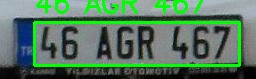



Procesando: 46_80_jpg.rf.ca778062e9a2a32b4a78774b1581c119.jpg

0: 192x640 1 my_pla2, 14.7ms
Speed: 1.4ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 46_80_jpg.rf.ca778062e9a2a32b4a78774b1581c119.jpg, Texto de la placa: 45 EN 109


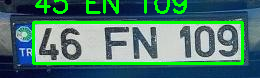



Procesando: 47_148_jpg.rf.8ac064a2fc7dfebd467a40a05982d107.jpg

0: 192x640 1 my_pla2, 13.9ms
Speed: 1.3ms preprocess, 13.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 47_148_jpg.rf.8ac064a2fc7dfebd467a40a05982d107.jpg, Texto de la placa: 47 LE 0611


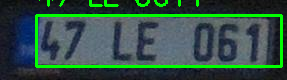



Procesando: 48_115_jpg.rf.3c02c765d319c10a8bc4165e4284648f.jpg

0: 352x640 1 my_pla2, 18.3ms
Speed: 3.0ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 48_115_jpg.rf.3c02c765d319c10a8bc4165e4284648f.jpg, Texto de la placa: ros


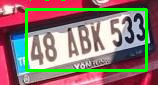



Procesando: 48_1512_jpg.rf.035346fee611443a53e4f5aae3ce9d7f.jpg

0: 256x640 1 my_pla2, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 48_1512_jpg.rf.035346fee611443a53e4f5aae3ce9d7f.jpg, Texto de la placa: 78 ADB 124


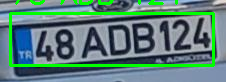



Procesando: 48_85_jpg.rf.29d2e6a4bc31f38bc344848ea0cedc7f.jpg

0: 224x640 1 my_pla2, 13.4ms
Speed: 2.8ms preprocess, 13.4ms inference, 3.4ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 48_85_jpg.rf.29d2e6a4bc31f38bc344848ea0cedc7f.jpg, Texto de la placa: 48 AKT 823)


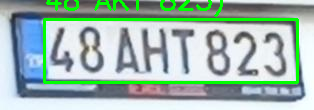



Procesando: 50_122_jpg.rf.7a3b38d3d115d1a6969ccba8db2912b6.jpg

0: 224x640 1 my_pla2, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 50_122_jpg.rf.7a3b38d3d115d1a6969ccba8db2912b6.jpg, Texto de la placa: 50 UF 456


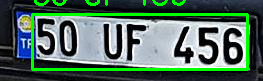



Procesando: 50_51_jpg.rf.7d616f1e5c8bfe0da4b9de98c073f68f.jpg

0: 256x640 1 my_pla2, 21.2ms
Speed: 1.9ms preprocess, 21.2ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 50_51_jpg.rf.7d616f1e5c8bfe0da4b9de98c073f68f.jpg, Texto de la placa: ™


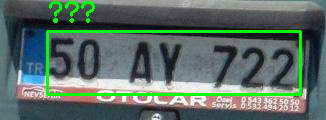



Procesando: 51_33_jpg.rf.b41fd4fbed67f6e41a35999a7b2b21c5.jpg

0: 224x640 1 my_pla2, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 51_33_jpg.rf.b41fd4fbed67f6e41a35999a7b2b21c5.jpg, Texto de la placa: 51 HE 822]


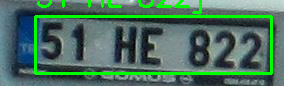



Procesando: 51_40_jpg.rf.46575fa974c9907861736c1a795915ce.jpg

0: 256x640 1 my_pla2, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 51_40_jpg.rf.46575fa974c9907861736c1a795915ce.jpg, Texto de la placa: 99 HK 708,


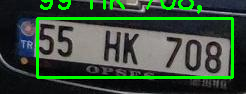



Procesando: 52_101_jpg.rf.f1f07c8444d02299753c7714b31b1a07.jpg

0: 224x640 1 my_pla2, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 52_101_jpg.rf.f1f07c8444d02299753c7714b31b1a07.jpg, Texto de la placa: 52 AAT522


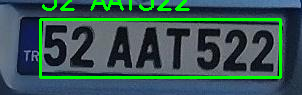



Procesando: 52_107_jpg.rf.296e6a7acf0c0506b1203f8b719e4e2c.jpg

0: 224x640 1 my_pla2, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 52_107_jpg.rf.296e6a7acf0c0506b1203f8b719e4e2c.jpg, Texto de la placa: 52 FT 034


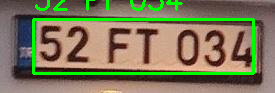



Procesando: 53_4_jpg.rf.4550448922baeb029969e159c6148f01.jpg

0: 192x640 2 my_pla2s, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 53_4_jpg.rf.4550448922baeb029969e159c6148f01.jpg, Texto de la placa: 53 FP 797]
Imagen: 53_4_jpg.rf.4550448922baeb029969e159c6148f01.jpg, Texto de la placa: |


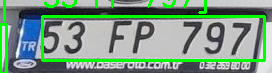



Procesando: 53_922_jpg.rf.ff4b98c4a808ed4d86f16123e06b08ae.jpg

0: 256x640 1 my_pla2, 9.6ms
Speed: 2.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 53_922_jpg.rf.ff4b98c4a808ed4d86f16123e06b08ae.jpg, Texto de la placa: 53 DS 575


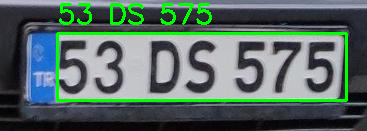



Procesando: 54_160_jpg.rf.3bfdc208b70d578f3f645275aec5e854.jpg

0: 352x640 1 my_pla2, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
Imagen: 54_160_jpg.rf.3bfdc208b70d578f3f645275aec5e854.jpg, Texto de la placa: 24 DE 289


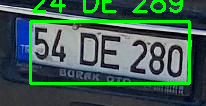



Procesando: 55_68_jpg.rf.34bad2e774d7395d2922940f5f793a3c.jpg

0: 320x640 1 my_pla2, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 55_68_jpg.rf.34bad2e774d7395d2922940f5f793a3c.jpg, Texto de la placa: a NL


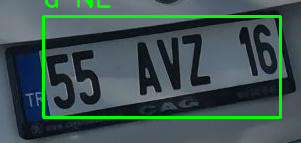



Procesando: 58_108_jpg.rf.4804e43875fa7dc18186245b5d5f6435.jpg

0: 512x640 1 my_pla2, 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)
Imagen: 58_108_jpg.rf.4804e43875fa7dc18186245b5d5f6435.jpg, Texto de la placa: SE 819


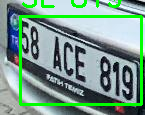



Procesando: 58_37_jpg.rf.f7765d27a84b7c0aa8c3c0c3e86fec3f.jpg

0: 192x640 3 my_pla2s, 16.7ms
Speed: 1.5ms preprocess, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 58_37_jpg.rf.f7765d27a84b7c0aa8c3c0c3e86fec3f.jpg, Texto de la placa: 53 NE 275)
Imagen: 58_37_jpg.rf.f7765d27a84b7c0aa8c3c0c3e86fec3f.jpg, Texto de la placa: .
Imagen: 58_37_jpg.rf.f7765d27a84b7c0aa8c3c0c3e86fec3f.jpg, Texto de la placa: ee


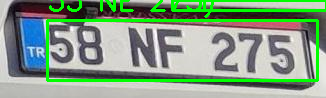



Procesando: 58_39_jpg.rf.614e11f3db19d33003cad5e2647a5d81.jpg

0: 224x640 1 my_pla2, 10.8ms
Speed: 1.5ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 58_39_jpg.rf.614e11f3db19d33003cad5e2647a5d81.jpg, Texto de la placa: 58 ADGG9"


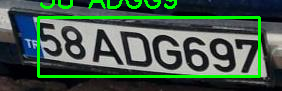



Procesando: 58_41_jpg.rf.b60f8a8c70dc646b4eb9c7ebf3a737b6.jpg

0: 256x640 1 my_pla2, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 58_41_jpg.rf.b60f8a8c70dc646b4eb9c7ebf3a737b6.jpg, Texto de la placa: D8 DB 262


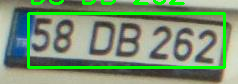



Procesando: 59_1413_jpg.rf.74503202f2d139648c6f86220a518bce.jpg

0: 224x640 1 my_pla2, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 59_1413_jpg.rf.74503202f2d139648c6f86220a518bce.jpg, Texto de la placa: 59 HN O06]


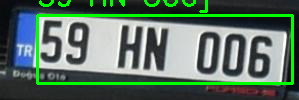



Procesando: 59_3_jpg.rf.32e48232afdb2f83b049c7b4a3731fc1.jpg

0: 288x640 1 my_pla2, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 59_3_jpg.rf.32e48232afdb2f83b049c7b4a3731fc1.jpg, Texto de la placa: 39 ZH 647.


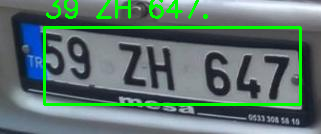



Procesando: 60_50_jpg.rf.4b124dd56206740b4407ab57f6682e8b.jpg

0: 224x640 1 my_pla2, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 60_50_jpg.rf.4b124dd56206740b4407ab57f6682e8b.jpg, Texto de la placa: 60 FA G64)


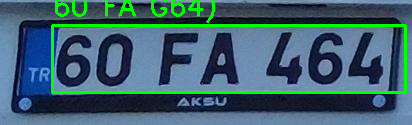



Procesando: 63_163_jpg.rf.c0bba9f596ccc7f6fc7c65b65a2e499b.jpg

0: 224x640 1 my_pla2, 10.5ms
Speed: 1.4ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 63_163_jpg.rf.c0bba9f596ccc7f6fc7c65b65a2e499b.jpg, Texto de la placa: 63 DY 519)


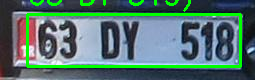



Procesando: 64_182_jpg.rf.fef72f1e3cf338923e8b6630add81ecf.jpg

0: 192x640 1 my_pla2, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 64_182_jpg.rf.fef72f1e3cf338923e8b6630add81ecf.jpg, Texto de la placa: 64 EN 450


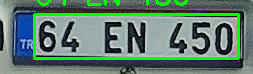



Procesando: 65_47_jpg.rf.ce68dfbc8d20c2db1dc01d606558c40d.jpg

0: 384x640 1 my_pla2, 13.1ms
Speed: 5.4ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Imagen: 65_47_jpg.rf.ce68dfbc8d20c2db1dc01d606558c40d.jpg, Texto de la placa: oS ABI a8


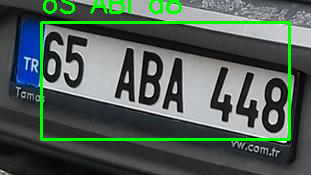



Procesando: 66_172_jpg.rf.c9759b2c8ebb7099bfbbfd276d9b09ea.jpg

0: 224x640 1 my_pla2, 21.7ms
Speed: 1.6ms preprocess, 21.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 66_172_jpg.rf.c9759b2c8ebb7099bfbbfd276d9b09ea.jpg, Texto de la placa: DOO AAUSOST


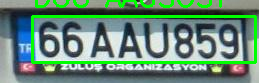



Procesando: 66_58_jpg.rf.27f5db3e350763e4a3fde1799b13e529.jpg

0: 192x640 2 my_pla2s, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 66_58_jpg.rf.27f5db3e350763e4a3fde1799b13e529.jpg, Texto de la placa: 66 AAY 529!
Imagen: 66_58_jpg.rf.27f5db3e350763e4a3fde1799b13e529.jpg, Texto de la placa: -


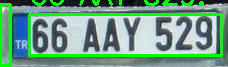



Procesando: 67_198_jpg.rf.636bd242e6032752d652c36756dfcad2.jpg

0: 512x640 1 my_pla2, 17.0ms
Speed: 2.9ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Imagen: 67_198_jpg.rf.636bd242e6032752d652c36756dfcad2.jpg, Texto de la placa: 


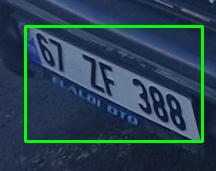



Procesando: 67_37_jpg.rf.ac3d058d3ddd449c44a70c882a5bb8b4.jpg

0: 256x640 1 my_pla2, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 8.8ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 67_37_jpg.rf.ac3d058d3ddd449c44a70c882a5bb8b4.jpg, Texto de la placa: 67 ABH 854


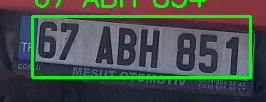



Procesando: 70_79_jpg.rf.020402b93979c833e46778f9187eb98e.jpg

0: 224x640 1 my_pla2, 20.1ms
Speed: 1.5ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 70_79_jpg.rf.020402b93979c833e46778f9187eb98e.jpg, Texto de la placa: 70 AK 2248


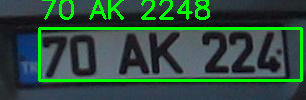



Procesando: 71_102_jpg.rf.bf3ded5a1c6e754fcc6e895201e13bb3.jpg

0: 288x640 1 my_pla2, 18.8ms
Speed: 1.7ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)
Imagen: 71_102_jpg.rf.bf3ded5a1c6e754fcc6e895201e13bb3.jpg, Texto de la placa: 


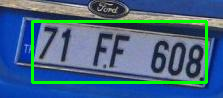



Procesando: 71_25_jpg.rf.dad6ebd0b72087c21133339be25dd5a1.jpg

0: 256x640 1 my_pla2, 15.4ms
Speed: 1.6ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 640)
Imagen: 71_25_jpg.rf.dad6ebd0b72087c21133339be25dd5a1.jpg, Texto de la placa: 71 AC 487,


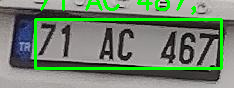



Procesando: 77_117_jpg.rf.d0db438abda68f1de8116ddc1a8efcde.jpg

0: 320x640 1 my_pla2, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 77_117_jpg.rf.d0db438abda68f1de8116ddc1a8efcde.jpg, Texto de la placa: A AE 709


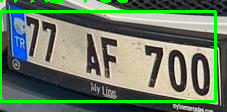



Procesando: 77_121_jpg.rf.09a7fe89824d420f3b2bcd1ad0069173.jpg

0: 384x640 1 my_pla2, 12.8ms
Speed: 2.2ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Imagen: 77_121_jpg.rf.09a7fe89824d420f3b2bcd1ad0069173.jpg, Texto de la placa: U7 ABA 649


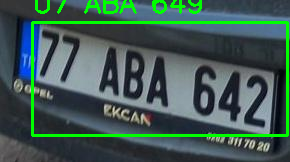



Procesando: 78_0_jpg.rf.9ad75cea86511d9b53d574c193689a3e.jpg

0: 224x640 1 my_pla2, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 78_0_jpg.rf.9ad75cea86511d9b53d574c193689a3e.jpg, Texto de la placa: 78 BC 159


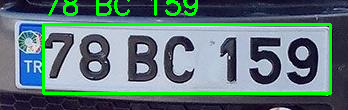



Procesando: 78_180_jpg.rf.51c36896480f0049a3119571f19900a5.jpg

0: 320x640 1 my_pla2, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 5.6ms postprocess per image at shape (1, 3, 320, 640)
Imagen: 78_180_jpg.rf.51c36896480f0049a3119571f19900a5.jpg, Texto de la placa: 


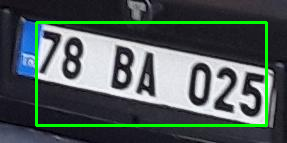



Procesando: 78_2_jpg.rf.10c039f6cd80137e3e8c54d2b5d77eff.jpg

0: 192x640 1 my_pla2, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 3.5ms postprocess per image at shape (1, 3, 192, 640)
Imagen: 78_2_jpg.rf.10c039f6cd80137e3e8c54d2b5d77eff.jpg, Texto de la placa: 78 AAG 050


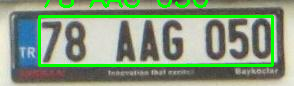



Procesando: 78_4_jpg.rf.001eb53ae4e638b900a33cceb247b38c.jpg

0: 448x640 1 my_pla2, 12.7ms
Speed: 2.7ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Imagen: 78_4_jpg.rf.001eb53ae4e638b900a33cceb247b38c.jpg, Texto de la placa: 


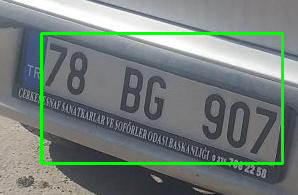



Procesando: 80_111_jpg.rf.6582652962b4e62c588b614d730f619e.jpg

0: 480x640 1 my_pla2, 13.9ms
Speed: 2.6ms preprocess, 13.9ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)
Imagen: 80_111_jpg.rf.6582652962b4e62c588b614d730f619e.jpg, Texto de la placa: pe


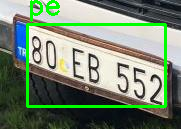



Procesando: 80_169_jpg.rf.d019bf5e9182798832d9331ecd740d77.jpg

0: 224x640 1 my_pla2, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Imagen: 80_169_jpg.rf.d019bf5e9182798832d9331ecd740d77.jpg, Texto de la placa: 80 GB 634


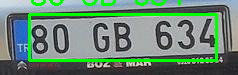

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import cv2
import pytesseract
import numpy as np
import os

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/CarLicensePlate/runs/detect/yolov8n_custom_transfer/weights/best.pt')

# Función para aplicar OCR a una imagen
def apply_ocr(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    text = pytesseract.image_to_string(thresh, config='--psm 7 --oem 3')
    return text.strip()

# Función para detectar placas y aplicar OCR
def detect_and_read_plates(image_path):
    img = cv2.imread(image_path)
    results = model(img)

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy().astype(int)
        for box in boxes:
            x1, y1, x2, y2 = box
            plate_img = img[y1:y2, x1:x2]
            plate_text = apply_ocr(plate_img)
            print(f"Imagen: {os.path.basename(image_path)}, Texto de la placa: {plate_text}")

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, plate_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    cv2_imshow(img)
    print("\n")  # Añadir una línea en blanco entre imágenes

# Función para procesar todas las imágenes en una carpeta
def process_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            print(f"Procesando: {filename}")
            detect_and_read_plates(image_path)

# Uso de la función
folder_path = '/content/drive/MyDrive/CarLicensePlate/my_pla2-1/valid/images'
process_folder(folder_path)

With edge filter

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import cv2
import pytesseract
import numpy as np
import os

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/LicencsePlateCar/best.pt')

# Función para aplicar detección de bordes
def apply_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Función para aplicar OCR a una imagen
def apply_ocr(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    text = pytesseract.image_to_string(thresh, config='--psm 7 --oem 3')
    return text.strip()

# Función para detectar placas y aplicar OCR
def detect_and_read_plates(image_path):
    img = cv2.imread(image_path)
    results = model(img)

    edge_img = apply_edge_detection(img)  # Aplicar detección de bordes a toda la imagen

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy().astype(int)
        for box in boxes:
            x1, y1, x2, y2 = box
            plate_img = edge_img[y1:y2, x1:x2]  # Usar la versión con bordes detectados

            plate_text = apply_ocr(plate_img)

            print(f"Imagen: {os.path.basename(image_path)}, Texto de la placa: {plate_text}")

            cv2.rectangle(edge_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(edge_img, plate_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    cv2_imshow(edge_img)  # Mostrar la imagen con bordes detectados
    print("\n")  # Añadir una línea en blanco entre imágenes

# Función para procesar todas las imágenes en una carpeta
def process_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            print(f"Procesando: {filename}")
            detect_and_read_plates(image_path)

# Uso de la función
folder_path = '/content/drive/MyDrive/LicencsePlateCar/my_pla2-1/valid/images'
process_folder(folder_path)

Using data set for validation plus



```
from roboflow import Roboflow
rf = Roboflow(api_key="your_api_key")
project = rf.workspace("license-plate-recognition-hylwq").project("license-plate-ulnns")
version = project.version(1)
dataset = version.download("yolov8")

```



In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import cv2
import pytesseract
import numpy as np
import os

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/CarLicensePlate/runs/detect/yolov8n_custom_transfer/weights/best.pt')

# Función para aplicar OCR a una imagen
def apply_ocr(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    text = pytesseract.image_to_string(thresh, config='--psm 7 --oem 3')
    return text.strip()

# Función para detectar placas y aplicar OCR
def detect_and_read_plates(image_path):
    img = cv2.imread(image_path)
    results = model(img)

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy().astype(int)
        for box in boxes:
            x1, y1, x2, y2 = box
            plate_img = img[y1:y2, x1:x2]
            plate_text = apply_ocr(plate_img)
            print(f"Imagen: {os.path.basename(image_path)}, Texto de la placa: {plate_text}")

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, plate_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    cv2_imshow(img)
    print("\n")  # Añadir una línea en blanco entre imágenes

# Función para procesar todas las imágenes en una carpeta
def process_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            print(f"Procesando: {filename}")
            detect_and_read_plates(image_path)

# Uso de la función
folder_path = '/content/drive/MyDrive/LicencsePlateCar/ModoSingular/License-Plate-1/valid/images'
process_folder(folder_path)